In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

Провести графический и корреляционный анализ данных.
Построить регрессионную модель.


1. построить графики зависимости целевой переменной от остальных, выявить зависимости.
2. Посмотреть корреляцию между переменными
3. Рассмотреть линейную, полиномиальную и кусочно-постоянную модели
4. Использовать стандартную процедуру с разбиением на train, test с кросс-валидацией


baseline R2=0.93 (r2_score ) --- для лучшей модели

## Графики и корреляции

In [8]:
df = pd.read_csv("lab01.csv").drop("Unnamed: 0", axis=1)
df

,x1,x2,x3,x4,x5,target
0,осень,6.0,10.0,684.853714,489.727534,127000.0
1,лето,6.0,5.0,787.439842,129.226659,54200.0
2,лето,7.0,8.0,934.334854,996.189811,107600.0
3,зима,7.0,7.0,507.949612,553.560324,91800.0
4,зима,10.0,10.0,154.831480,88.940079,171500.0
...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0
996,осень,7.0,6.0,842.487798,164.747387,53800.0
997,осень,10.0,7.0,497.651151,639.352422,122800.0
998,осень,8.0,6.0,282.684179,194.777096,84400.0


In [9]:
df = pd.concat([df, pd.get_dummies(df['x1'])], axis=1)
df

,x1,x2,x3,x4,x5,target,весна,зима,лето,осень
0,осень,6.0,10.0,684.853714,489.727534,127000.0,0,0,0,1
1,лето,6.0,5.0,787.439842,129.226659,54200.0,0,0,1,0
2,лето,7.0,8.0,934.334854,996.189811,107600.0,0,0,1,0
3,зима,7.0,7.0,507.949612,553.560324,91800.0,0,1,0,0
4,зима,10.0,10.0,154.831480,88.940079,171500.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,осень,8.0,5.0,827.094070,4.385557,61800.0,0,0,0,1
996,осень,7.0,6.0,842.487798,164.747387,53800.0,0,0,0,1
997,осень,10.0,7.0,497.651151,639.352422,122800.0,0,0,0,1
998,осень,8.0,6.0,282.684179,194.777096,84400.0,0,0,0,1


In [10]:
df.corr()

,x2,x3,x4,x5,target,весна,зима,лето,осень
x2,1.000000,-0.031210,0.030458,0.047308,0.556719,0.030420,-0.010294,-0.004061,-0.016338
x3,-0.031210,1.000000,0.040714,0.001254,0.522521,-0.009601,0.006544,-0.014959,0.018342
x4,0.030458,0.040714,1.000000,0.010863,-0.297098,0.006076,0.010955,0.013396,-0.030931
x5,0.047308,0.001254,0.010863,1.000000,0.027597,-0.007399,-0.006646,-0.004274,0.018617
target,0.556719,0.522521,-0.297098,0.027597,1.000000,0.019340,-0.267587,0.316556,-0.070209
весна,0.030420,-0.009601,0.006076,-0.007399,0.019340,1.000000,-0.337792,-0.339584,-0.327935
зима,-0.010294,0.006544,0.010955,-0.006646,-0.267587,-0.337792,1.000000,-0.338686,-0.327067
лето,-0.004061,-0.014959,0.013396,-0.004274,0.316556,-0.339584,-0.338686,1.000000,-0.328802
осень,-0.016338,0.018342,-0.030931,0.018617,-0.070209,-0.327935,-0.327067,-0.328802,1.000000


<AxesSubplot:>

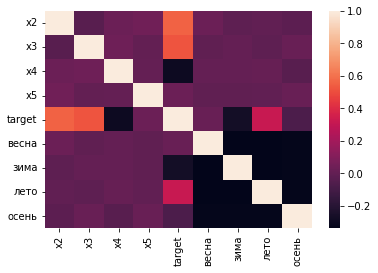

In [11]:
sns.heatmap(df.corr())

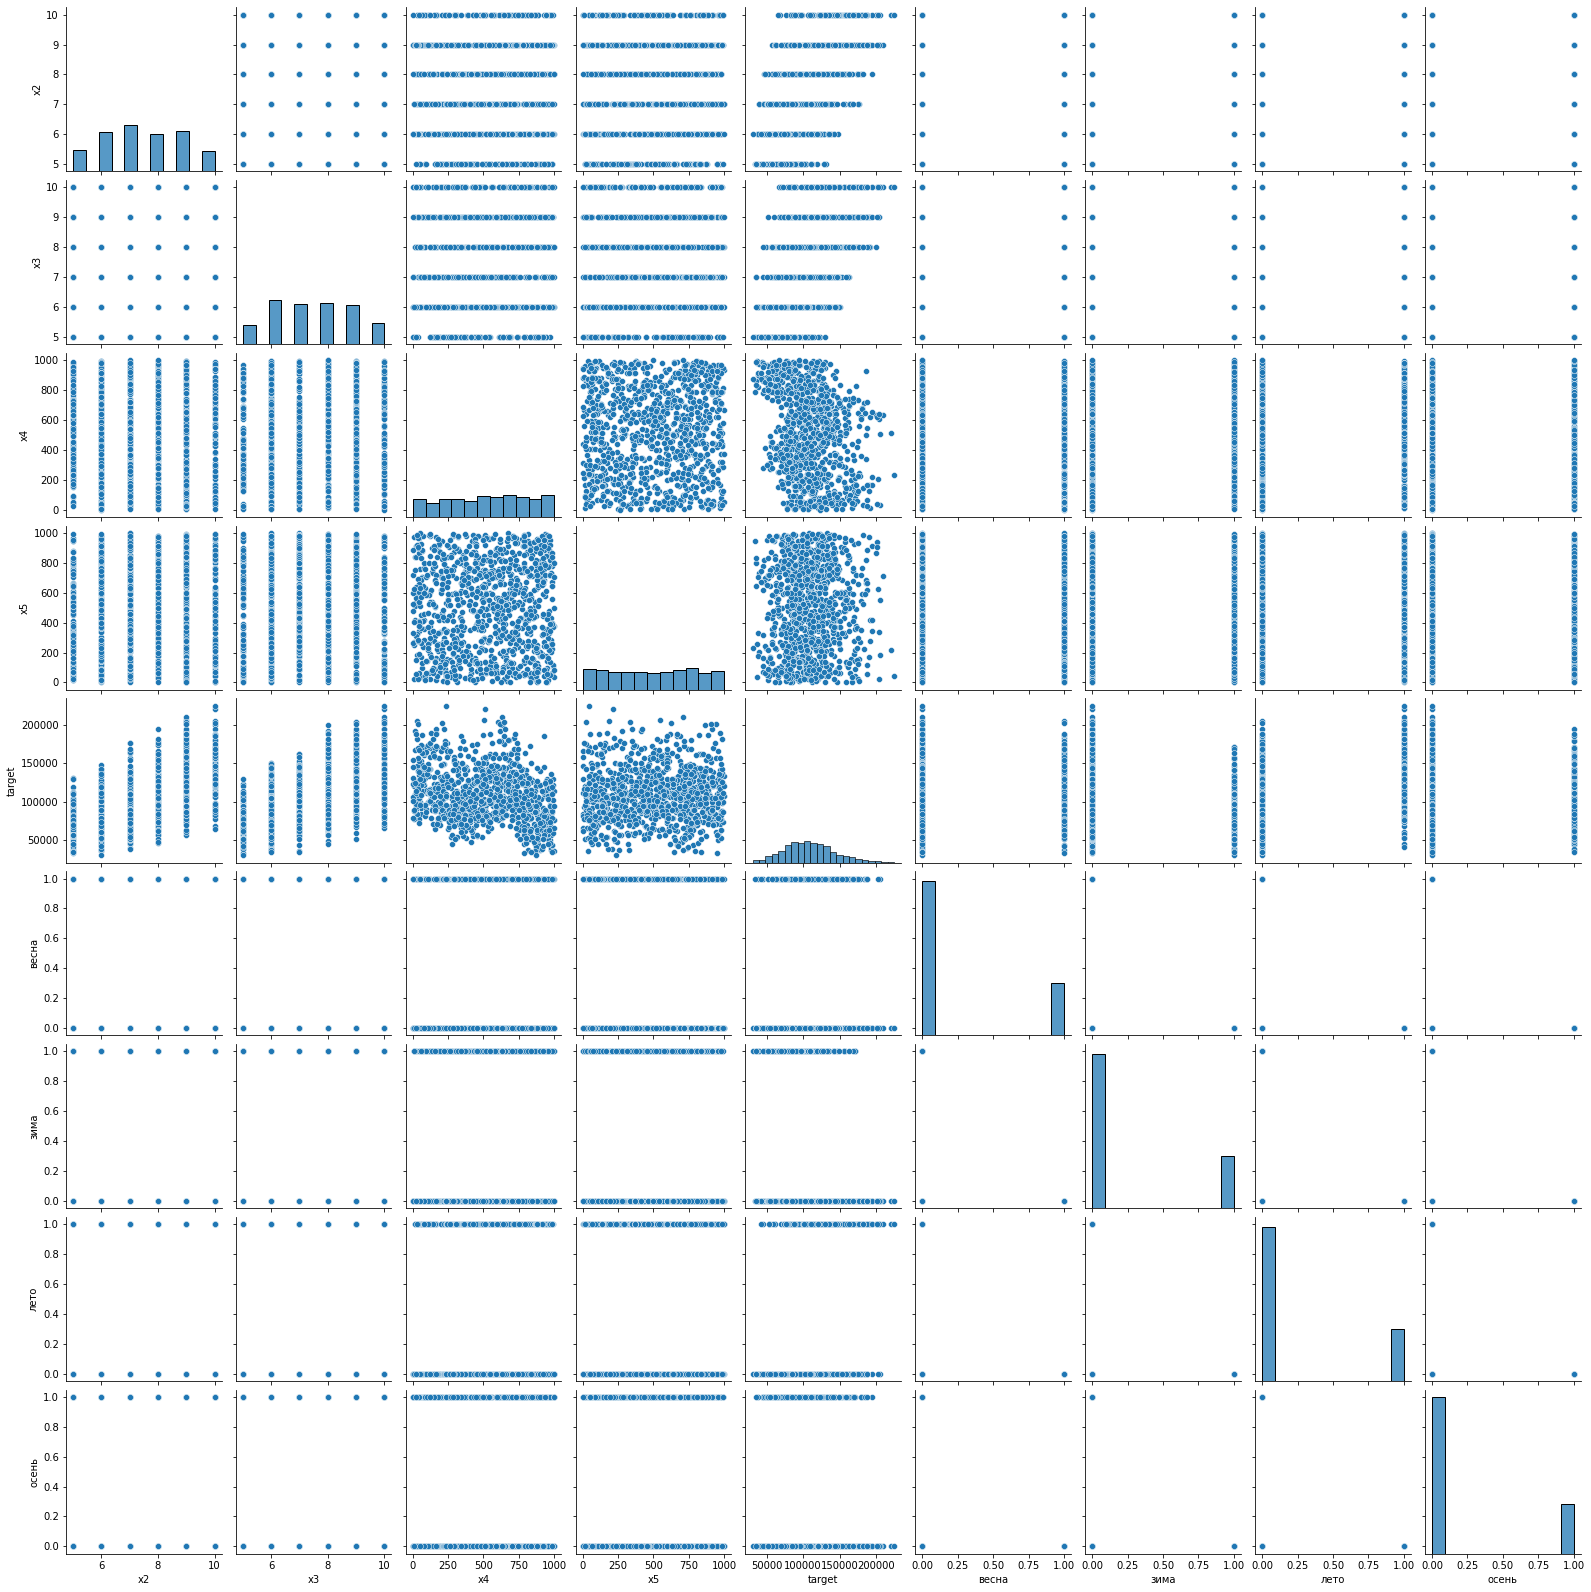

In [26]:
sns.pairplot(df)

Ага. x2 и x3 -- наиболее сильная корреляция с таргетом. Есть ещё немного отрицательной зависимости у x4

In [39]:
print(set(df['x2']), set(df['x3']))

{5.0, 6.0, 7.0, 8.0, 9.0, 10.0} {5.0, 6.0, 7.0, 8.0, 9.0, 10.0}


In [12]:
df = df.drop("x1", axis=1)

## Модели

In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [20]:
def train_evaluate(df, template_model):
    model = template_model
    X = df.drop("target", axis=1)
    y = df.target
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, random_state = 42)
    

    cv_model = cross_validate(model, X, y, scoring='r2', cv=5)
    print('cross_val_score')
    print(max(cv_model['test_score']))
    print('*************************************')
    usual_model = model.fit(X_train, Y_train)
    preds = usual_model.predict(X_test)
    print('RMSE')
    print(np.sqrt(mean_squared_error(Y_test, preds)))
    print('MAE')
    print(mean_absolute_error(Y_test, preds))
    print(r2_score(Y_test, preds))

    x = [random.randint(1, 8000) for i in range(len(Y_test))]
    plt.figure(figsize = (15, 10))
    plt.scatter(x, Y_test, color='#4B0082')
    plt.scatter(x, preds, color='cyan')
    plt.show()

cross_val_score
0.8705908913785756
*************************************
RMSE
12982.407766647742
MAE
10535.3297929289
0.8784650064199022


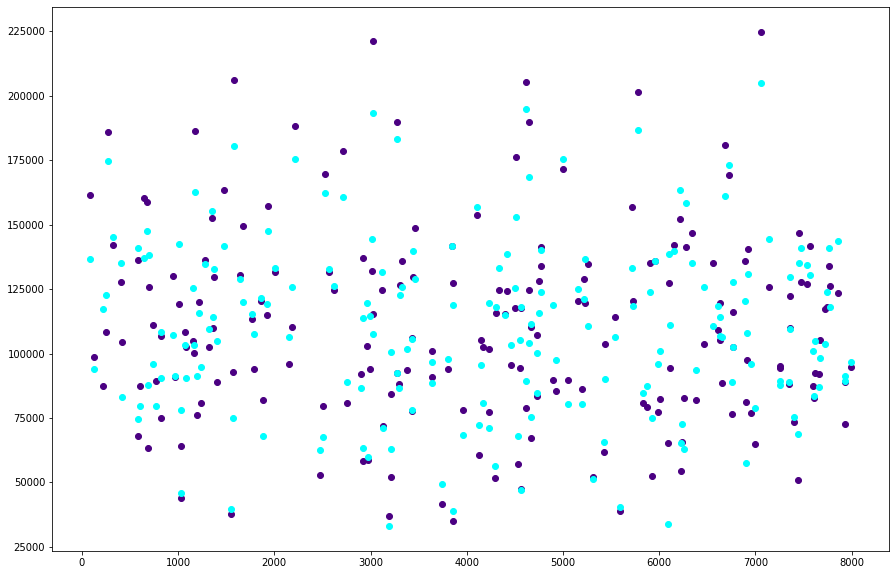

In [21]:
from sklearn.linear_model import LinearRegression

train_evaluate(df, LinearRegression())

cross_val_score
0.8676703895328228
*************************************
RMSE
13941.969014454164
MAE
10826.0
0.8598351627449481


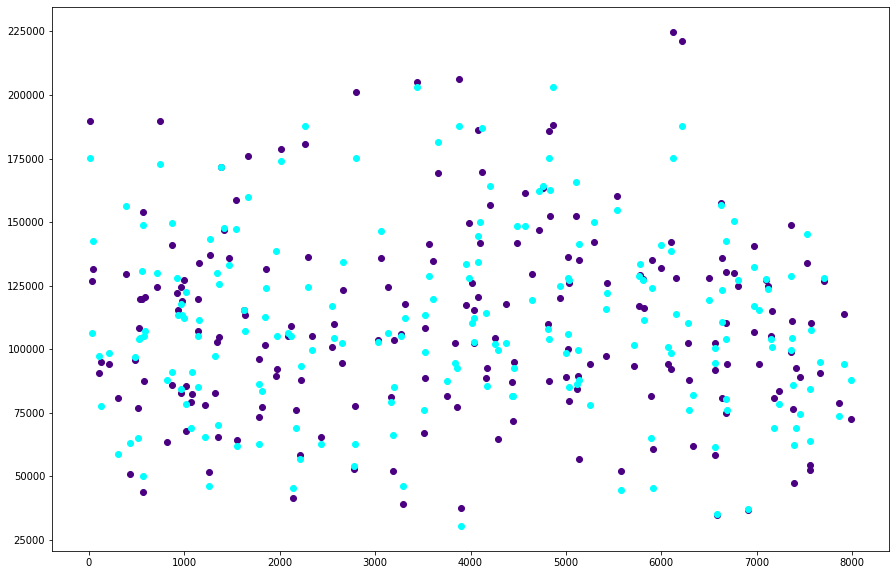

In [23]:
from sklearn.tree import DecisionTreeRegressor

train_evaluate(df, DecisionTreeRegressor(random_state=42))

In [25]:
dummies_df = pd.concat([df, pd.get_dummies(df['x2'])], axis=1)
dummies_df = pd.concat([dummies_df, pd.get_dummies(dummies_df['x3'])], axis=1)
dummies_df = dummies_df.drop("x2", axis=1)
dummies_df = dummies_df.drop("x3", axis=1)
dummies_df

,x4,x5,target,весна,зима,лето,осень,5.0,6.0,7.0,8.0,9.0,10.0,5.0,6.0,7.0,8.0,9.0,10.0
0,684.853714,489.727534,127000.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,787.439842,129.226659,54200.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,934.334854,996.189811,107600.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
3,507.949612,553.560324,91800.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,154.831480,88.940079,171500.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,827.094070,4.385557,61800.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
996,842.487798,164.747387,53800.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
997,497.651151,639.352422,122800.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
998,282.684179,194.777096,84400.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


cross_val_score
0.8712325050414026
*************************************
RMSE
13069.975463164568
MAE
10701.68101537935
0.8768199445567976


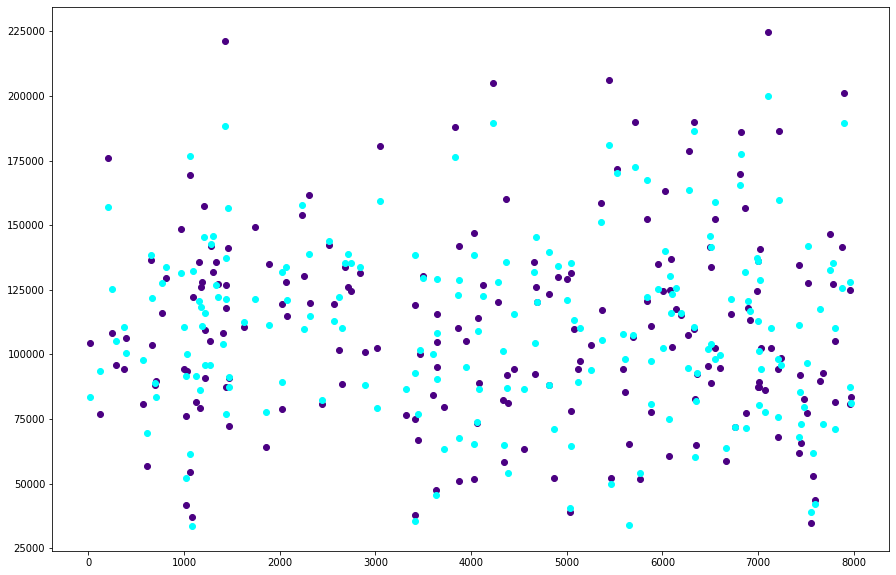

In [28]:
train_evaluate(dummies_df, LinearRegression())

cross_val_score
0.846333498483802
*************************************
RMSE
18215.102250605127
MAE
13118.5
0.7607488259009519


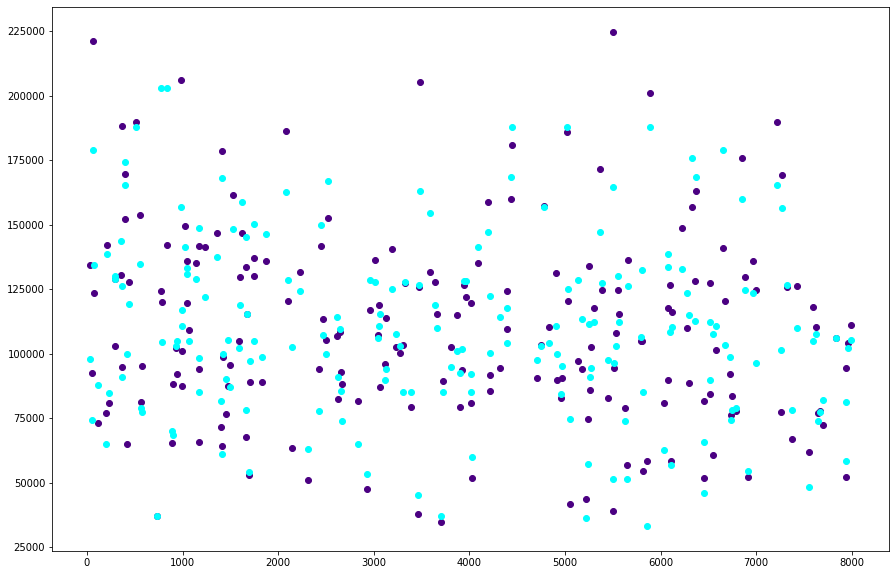

In [29]:
train_evaluate(dummies_df, DecisionTreeRegressor(random_state=42))

In [48]:
short_df = df[['x2', 'x3', 'target']]
short_df

,x2,x3,target
0,6.0,10.0,127000.0
1,6.0,5.0,54200.0
2,7.0,8.0,107600.0
3,7.0,7.0,91800.0
4,10.0,10.0,171500.0
...,...,...,...
995,8.0,5.0,61800.0
996,7.0,6.0,53800.0
997,10.0,7.0,122800.0
998,8.0,6.0,84400.0


cross_val_score
0.6217300731435471
*************************************
RMSE
21605.979927377753
MAE
17507.536521041577
0.6633808746049251


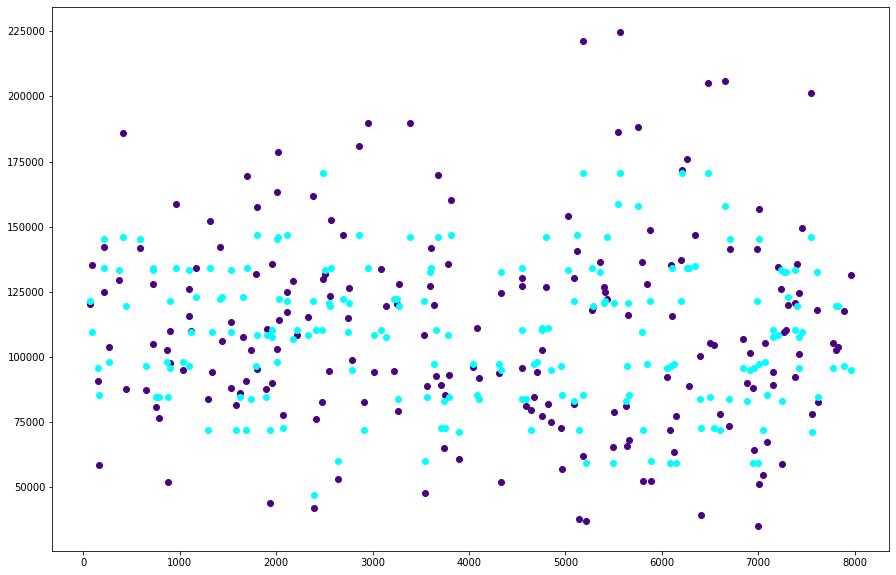

In [49]:
train_evaluate(short_df, LinearRegression())

cross_val_score
0.6302985461608539
*************************************
RMSE
21048.588060696864
MAE
16958.019217453115
0.6805250667608798


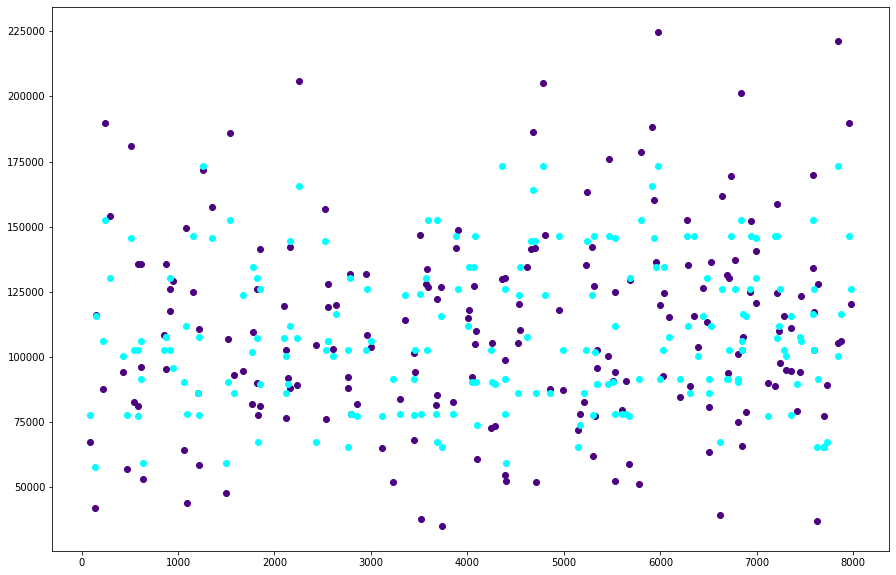

In [54]:
train_evaluate(short_df, DecisionTreeRegressor(random_state=42))

In [50]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()
poly_df = pd.concat([df, pd.DataFrame(pf.fit_transform(df[['x4', 'x5']]))], axis=1)

cross_val_score
0.8829088233116692
*************************************
RMSE
12790.450731409292
MAE
10361.604215782829
0.8820324529598774


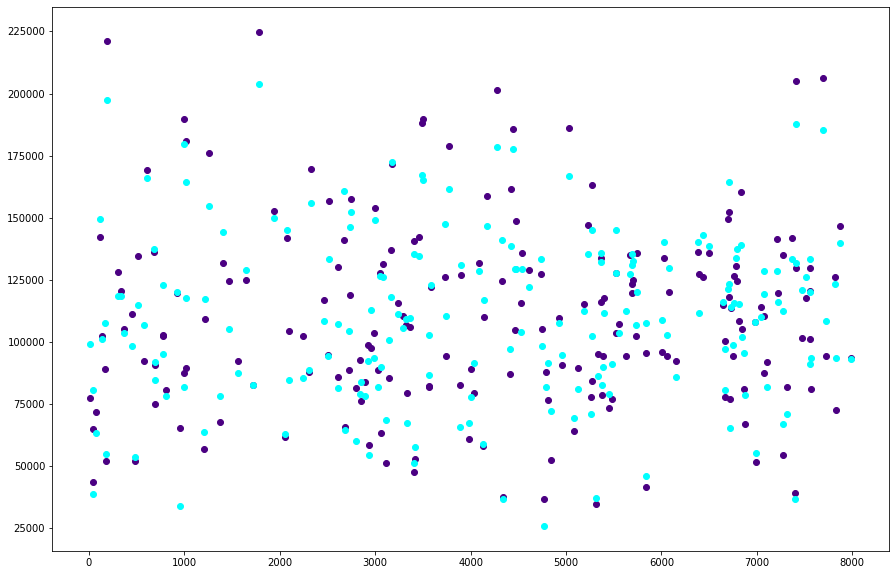

In [51]:
train_evaluate(poly_df, LinearRegression())

cross_val_score
0.8720106627157396
*************************************
RMSE
14324.178859536765
MAE
11094.0
0.8520447701049767


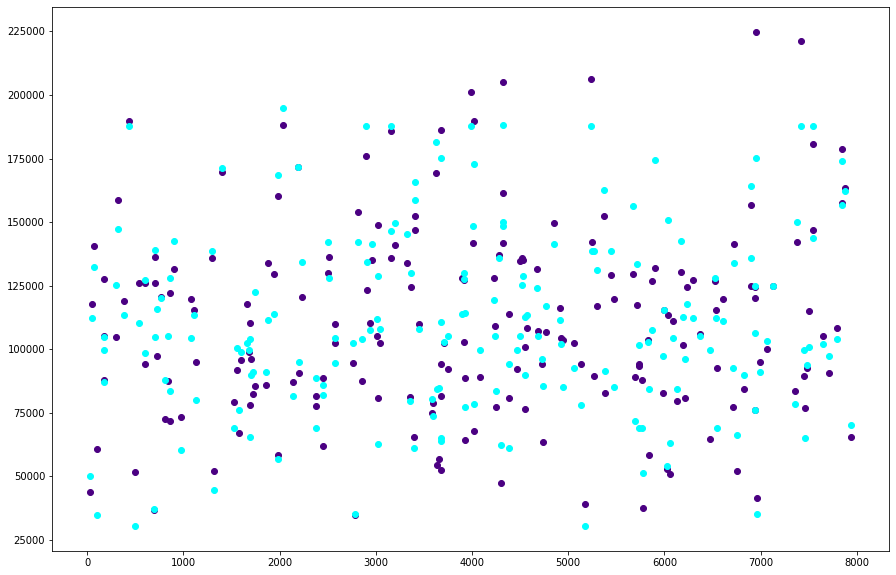

In [56]:
train_evaluate(poly_df, DecisionTreeRegressor(random_state=42))

In [57]:
poly_dummies_df = pd.concat([dummies_df, pd.DataFrame(pf.fit_transform(dummies_df[['x4', 'x5']]))], axis=1)

cross_val_score
0.8796802810162571
*************************************
RMSE
12873.565261155129
MAE
10407.194162429694
0.8804943251657824


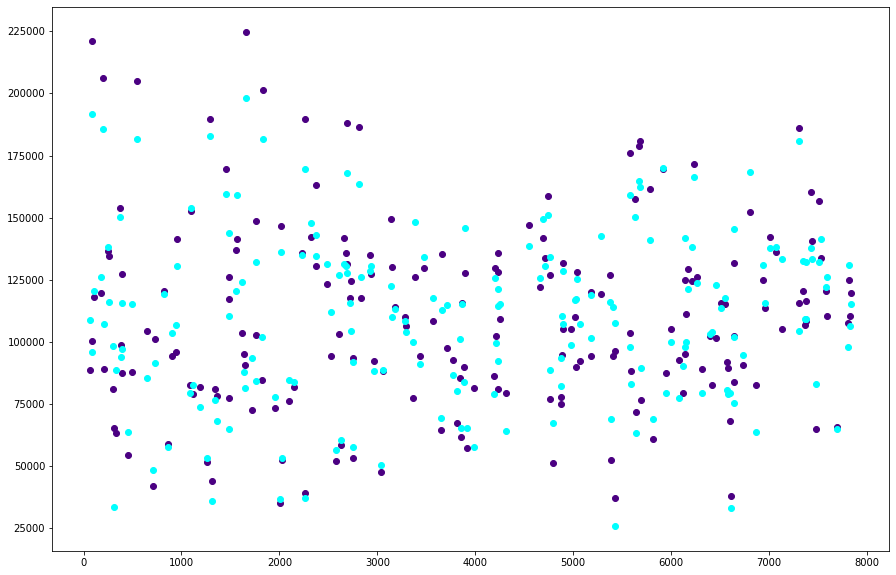

In [53]:
train_evaluate(poly_dummies_df, LinearRegression())

cross_val_score
0.8064417498521643
*************************************
RMSE
18531.35637366301
MAE
13691.952242676834
0.7523688544713635


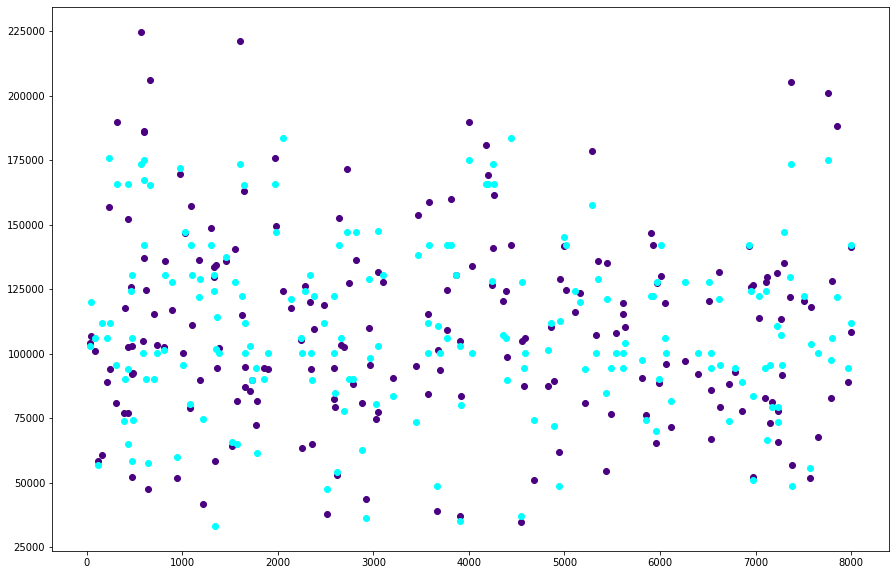

In [65]:
train_evaluate(poly_dummies_df, DecisionTreeRegressor(max_depth=9, random_state=42))

In [80]:
from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer()
kbd_df = pd.concat([df, pd.DataFrame(kbd.fit_transform(df[['x4', 'x5']]).toarray())], axis=1)


cross_val_score
0.9084356236528058
*************************************
RMSE
10995.898015866787
MAE
8580.2362576584
0.912812895049261


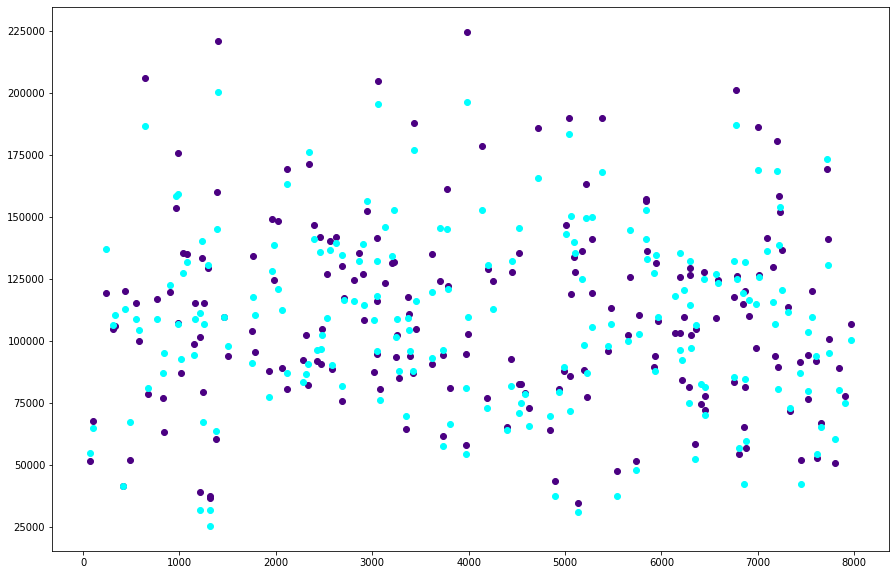

In [81]:
train_evaluate(kbd_df, LinearRegression())

cross_val_score
0.8736535189764179
*************************************
RMSE
14078.517391155669
MAE
11066.338636363635
0.8570761540942371


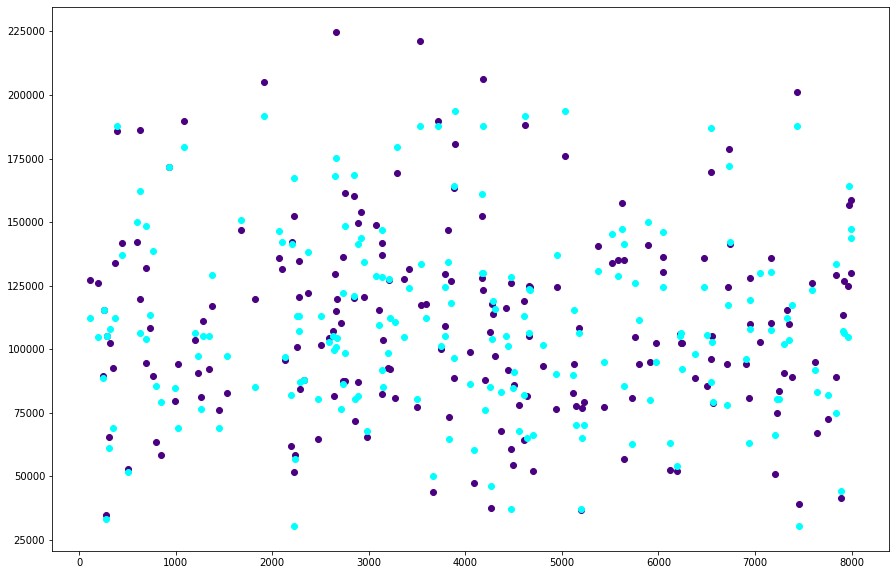

In [85]:
train_evaluate(kbd_df, DecisionTreeRegressor(max_depth=10, random_state=42))